# Homework 2 Coding: Logistic Regression.
  Please export this jupyter notebook as PDF, and hand in .pdf (with writing part) file.

In this part of homework, you need to implement Logistic Regression using Python in this jupyter notebook.

## Part 0: Preparation before training.

This part loads the necessary libraries and dataset. You are only required to do the normalization by yourself.

In [1]:
#import all the required libraries. You need to implement them in first.
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Loading the dataset including features and binary labels
data = load_breast_cancer().data
target = load_breast_cancer().target

In [3]:
# Size of features and labels
data.shape, target.shape

((569, 30), (569,))

In [4]:
#Splitting the data into train and test sets 2:1 with certain random seed.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

Normalizing data (by yourself)


In [5]:
# A useful trick before training is to normalize all features to have mean 0 and unit variance first.
# Please implement this by yourself rather than use sklearn.preprocessing.StandardScaler as the comment below.
"""
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""
#Your codes below:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

Some helper functions are given below, you are free to use them or not in parts below.

In [6]:
# Function to predict y of x with current weights
def predict(x, w):
    y_pred = []
    for it in range(len(x)):
        input = np.insert(x[it], 0, 1, axis=0)
        y = (1 / (1 + np.exp(-(np.dot(w, input)))))
        if y < 0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return np.array(y_pred)

In [7]:
#Function to calculate TPR,FPR,TNR and FNR to be included in confusion matrix
def find_rates(mat):
    mat2 = [(mat[0, 0]), (mat[1, 0]), (mat[0, 1]), (mat[1, 1])]
    mat2 = np.reshape(mat2, (2, 2))
    mat2 = pd.DataFrame(mat2, columns=[0, 1], index=[0, 1])
    mat2.index.name = 'Predicted'
    mat2.columns.name = 'Actual'
    return mat2

## Part 1: Implement Logistic Regression using sklearn.

In this part, you are firstly given an example Sklearn implementation of logistic regression. Play with them and then you should:
1.  Explain the parameters and their effects in LogisticRegression().
2.  Try different settings of parameters and show its performance as the example.

You can read official document from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
#Logistic regression using sklearn
LRexample = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
LRexample.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [9]:
# Predict on the test set
y_pred_sklearn = LRexample.predict(X_test)

In [10]:
# The labels of ground-truth on test set.
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 67, 121]))

In [11]:
# The labels produced by LR model on test set.
np.unique(y_pred_sklearn, return_counts=True)

(array([0, 1]), array([ 67, 121]))

In [12]:
# true-negative, false-negative, false-negative, true-positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sklearn).ravel()
(tn, fp, fn, tp)

(66, 1, 1, 120)

<AxesSubplot:title={'center':'Confusion Matrix for test data using sklearn Logistic Regression'}, xlabel='Actual', ylabel='Predicted'>

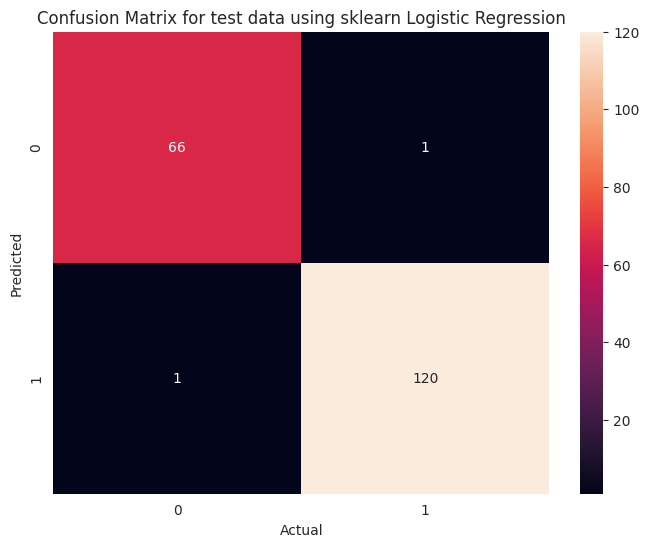

In [13]:
mat_test = find_rates(confusion_matrix(y_test, y_pred_sklearn))

fig = plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for test data using sklearn Logistic Regression')
sns.heatmap(mat_test, annot=True, fmt='g')

In [14]:
LRexample.score(X_test, y_test)
coef = LRexample.coef_[0].copy()

Explain the parameters and their effects in LogisticRegression( ) in the Markdown cell below.

penalty='l2' means that we use l2 norm of all parameters $||\mathbf{w}||_2^2$ to do regularization.
C=0.1 means we set the regularization strength $\lambda$ to $\frac{1}{C}=10$ so that the the smaller C is, the larger the penalty is.
solver='liblinear' means that we use coordinate descent algorithm to optimize the model.

Try different settings of Sklearn implementation of logistic regression and show the performance as the example above. Write your codes below. 

tn=65,fp=2,fn=4,tp=117
score=0.9680851063829787


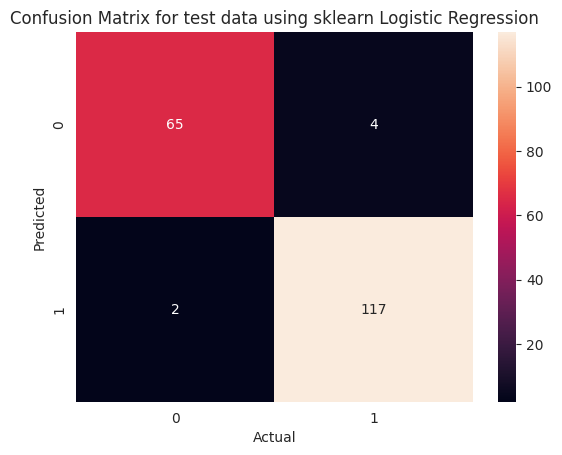

In [15]:
LRexample = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
LRexample.fit(X_train, y_train)
# Predict on the test set
y_pred_sklearn = LRexample.predict(X_test)
# The labels of ground-truth on test set.
np.unique(y_test, return_counts=True)
# The labels produced by LR model on test set.
np.unique(y_pred_sklearn, return_counts=True)
# true-negative, false-negative, false-negative, true-positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sklearn).ravel()
print(f"tn={tn},fp={fp},fn={fn},tp={tp}")
mat_test = find_rates(confusion_matrix(y_test, y_pred_sklearn))
plt.title('Confusion Matrix for test data using sklearn Logistic Regression')
sns.heatmap(mat_test, annot=True, fmt='g')
print(f"score={LRexample.score(X_test, y_test)}")

tn=66,fp=1,fn=4,tp=117
score=0.973404255319149


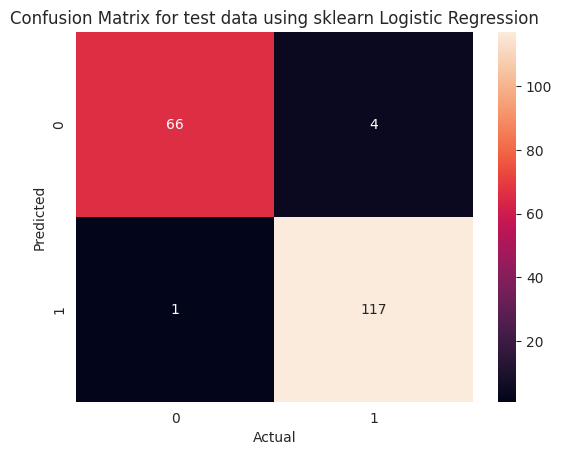

In [16]:
LRexample = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
LRexample.fit(X_train, y_train)
# Predict on the test set
y_pred_sklearn = LRexample.predict(X_test)
# The labels of ground-truth on test set.
np.unique(y_test, return_counts=True)
# The labels produced by LR model on test set.
np.unique(y_pred_sklearn, return_counts=True)
# true-negative, false-negative, false-negative, true-positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sklearn).ravel()
print(f"tn={tn},fp={fp},fn={fn},tp={tp}")
mat_test = find_rates(confusion_matrix(y_test, y_pred_sklearn))
plt.title('Confusion Matrix for test data using sklearn Logistic Regression')
sns.heatmap(mat_test, annot=True, fmt='g')
print(f"score={LRexample.score(X_test, y_test)}")

tn=66,fp=1,fn=3,tp=118
score=0.9787234042553191


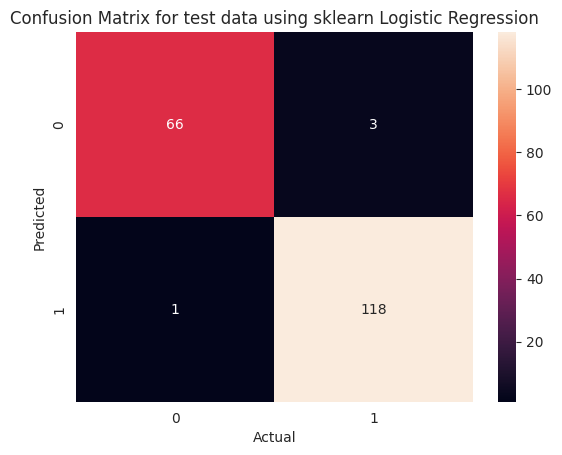

In [17]:
LRexample = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
LRexample.fit(X_train, y_train)
# Predict on the test set
y_pred_sklearn = LRexample.predict(X_test)
# The labels of ground-truth on test set.
np.unique(y_test, return_counts=True)
# The labels produced by LR model on test set.
np.unique(y_pred_sklearn, return_counts=True)
# true-negative, false-negative, false-negative, true-positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sklearn).ravel()
print(f"tn={tn},fp={fp},fn={fn},tp={tp}")
mat_test = find_rates(confusion_matrix(y_test, y_pred_sklearn))
plt.title('Confusion Matrix for test data using sklearn Logistic Regression')
sns.heatmap(mat_test, annot=True, fmt='g')
print(f"score={LRexample.score(X_test, y_test)}")

tn=65,fp=2,fn=1,tp=120
score=0.9840425531914894


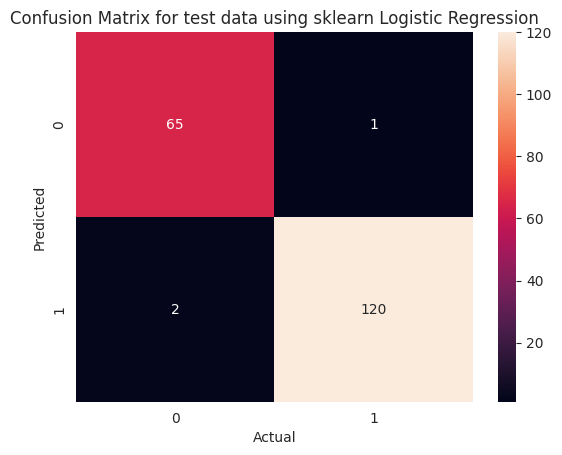

In [18]:
LRexample = LogisticRegression(penalty='l2', C=0.1, solver='newton-cg')
LRexample.fit(X_train, y_train)
# Predict on the test set
y_pred_sklearn = LRexample.predict(X_test)
# The labels of ground-truth on test set.
np.unique(y_test, return_counts=True)
# The labels produced by LR model on test set.
np.unique(y_pred_sklearn, return_counts=True)
# true-negative, false-negative, false-negative, true-positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sklearn).ravel()
print(f"tn={tn},fp={fp},fn={fn},tp={tp}")
mat_test = find_rates(confusion_matrix(y_test, y_pred_sklearn))
plt.title('Confusion Matrix for test data using sklearn Logistic Regression')
sns.heatmap(mat_test, annot=True, fmt='g')
print(f"score={LRexample.score(X_test, y_test)}")

## Part 2: Implement Logistic Regression without using its library. 

In this part, you need to implement Logistic regression model using Batch Gradient Descent and Stochastic Gradient Descent by yourself. The hyperparameters of the two algorithms are given and recommended. Notice that with given hyperparameters and random seeds, the weights obtained by BGD and SGD with momentum should be unique.

### Part 2.1: Implement logistic regression using Batch-GD

Describe the Batch-GD algorithm in the Markdown cell below. You are free to use mathematical derivation or not.

Batch-Gradient-Descent algorithm means all training data are visible. For logistic regression problem with 2 classes, we assume each class follows the Bernoulli distribution. Then the likelihood is:
$$L(\mathbf{w}|\mathcal{X})=\prod_{t=1}^N(y^t)^{r^t}(1-y^t)^{1-r^t}$$
And the regularized loss function is:
$$E(\mathbf{w}|\mathcal{X})=-\log{L(\mathbf{w}|\mathcal{X})}+\frac{\lambda}{2}||\mathbf{w}||_2^2=-\sum_t\left[r^t\log{y^t}+(1-r^t)\log{(1-y^t)}\right]+\frac{\lambda}{2}||\mathbf{w}||_2^2$$
where $y_i^t = sigmoid(\mathbf{wx})$.
Then the corresponding update rules for $\mathbf{w}$ and $w_0$ are as following:
$$\Delta w_j=-\eta\frac{\partial E}{\partial w_j}=\eta\sum_t(r_j^t-y_j^t)x_j^t-\eta\lambda w_j,\quad for\ j=1,2\cdots,d$$
$$\Delta w_0=-\eta\frac{\partial E}{\partial w_0}=\eta\sum_t(r^t-y^t)-\eta\lambda w_0$$
$$w_j = w_j + \Delta w_j$$
$$w_0 = w_0 + \Delta w_0$$

In [19]:
"""
At each iteration, train all the samples and update weights. The initialization point should be set to all-zero vector.
"""
n_iter = 50  # number of iterations
reg = 0.01  # regularization parameter lambda
r = 0.1  # learning rate
N, d = X_train.shape
w_BGD = np.zeros((d + 1))
for j in range(n_iter):
    delta = np.zeros((d + 1))
    for it in range(N):
        input = np.insert(X_train[it], 0, 1, axis=0)
        y = 1 / (1 + np.exp(-np.dot(w_BGD, input)))
        delta += (y_train[it] - y) * input
    w_BGD += r * (delta - reg * w_BGD)

/tmp/ipykernel_7358/1462154002.py:13: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-np.dot(w_BGD, input)))


In [20]:
#Getting predictions for test datapoints
y_pred_BGD = predict(X_test, w_BGD)

In [21]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 67, 121]))

In [22]:
np.unique(y_pred_BGD, return_counts=True)

(array([0, 1]), array([ 69, 119]))

<AxesSubplot:title={'center':'Confusion Matrix for test data using BGD Logistic Regression'}, xlabel='Actual', ylabel='Predicted'>

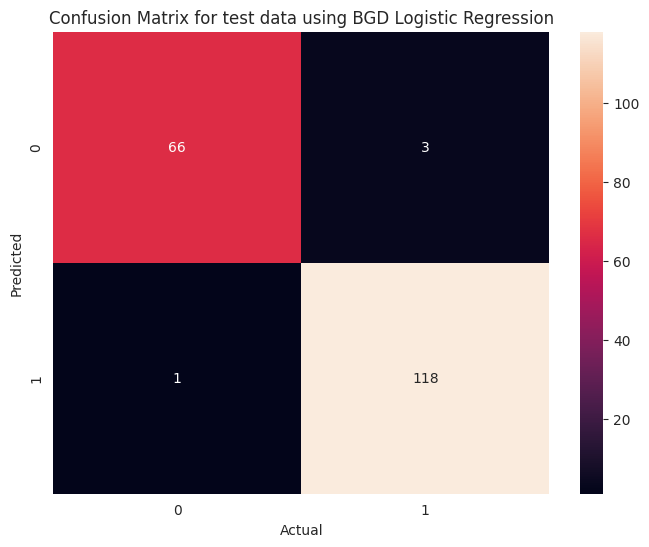

In [23]:
# Draw confusion matrix
mat_test = find_rates(confusion_matrix(y_test, y_pred_BGD))

fig = plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for test data using BGD Logistic Regression')
sns.heatmap(mat_test, annot=True, fmt='g')

### Part 2.2: Implement logistic regression using SGD with momentum

In this part, you need to implement logistic regression using SGD method with momentum for accelerating training.
Intuitively, the method tries to accelerate with keeping the 'momentum' by moving along a previous direction. You may find Chapter 8.3 
helpful https://www.deeplearningbook.org/contents/optimization.html for more details with respect to SGD, momentum and
more acceleration tricks. 

Describe the SGD with momentum algorithm in the Markdown cell below. You are free to use mathematical derivation or not.

SGD with momentum algorithm means only part of training data are visible and we use momentum to accelerate convergence. For logistic regression problem with 2 classes, we assume each class follows the Bernoulli distribution. Then the likelihood is:
$$L(\mathbf{w}|\mathcal{X})=\prod_{t=1}^M(y^t)^{r^t}(1-y^t)^{1-r^t}$$
And the regularized loss function is:
$$E(\mathbf{w}|\mathcal{X})=-\frac{1}{M}\log{L(\mathbf{w},w_0|\mathcal{X})}+\frac{\lambda}{2}||\mathbf{w}||_2^2=-\frac{1}{M}\sum_t\left[r^t\log{y^t}+(1-r^t)\log{(1-y^t)}\right]+\frac{\lambda}{2}||\mathbf{w}||_2^2$$
where $y_i^t = sigmoid(\mathbf{wx})$.
Then the corresponding update rules for velocity $v$ and parameter $\mathbf{w}$ are as following:
$$\Delta w_j=\alpha \Delta w_j-\eta\frac{\partial E}{\partial w_j}=\alpha \Delta w_j+\eta\frac{1}{M}\sum_t(r_j^t-y_j^t)x_j^t-\eta\lambda w_j,\quad for\ j=1,2\cdots,d$$
$$\Delta w_0=\alpha \Delta w_0-\eta\frac{\partial E}{\partial w_0}=\alpha \Delta w_0+\eta\frac{1}{M}\sum_t(r^t-y^t)-\eta\lambda w_0$$
$$w_j = w_j + \Delta w_j$$
$$w_0 = w_0 + \Delta w_0$$

In [24]:
"""
At each iteration, choose 20 samples randomly and compute dJ(theta)/d(theta) among 
those 20 samples then update the vector of weights with momentum. The initialization point should be set to all-zero vector.

Note that the random seed at each iteration is given, do not modify it.
"""
n_iter = 50  # number of iterations
reg = 0.01  # regularization parameter lambda
r = 0.1  # learning rate
momen = 0.5  # momentum rate
sample_size = 20  # sample size for SGD
N, d = X_train.shape
w_SGD = np.zeros((d + 1))
v = 0
for j in range(n_iter):
    np.random.seed(j)
    idx = np.random.randint(X_train.shape[0], size=sample_size)
    # Do NOT modify codes above, especially the random code.
    # At each iteration, choose samples from X_train, y_train, with index idx.
    # Your codes below:
    delta = 0
    for i in idx:
        input = np.insert(X_train[i], 0, 1, axis=0)
        y = 1 / (1 + np.exp(-np.dot(w_SGD, input)))
        delta += r * (y_train[i] - y) * input
    delta /= sample_size
    delta -= r * reg * w_SGD
    delta += momen * v
    v = delta
    w_SGD += delta

In [25]:
#Getting predictions for test datapoints
y_pred_SGD = predict(X_test, w_SGD)

In [26]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 67, 121]))

In [27]:
np.unique(y_pred_SGD, return_counts=True)

(array([0, 1]), array([ 68, 120]))

<AxesSubplot:title={'center':'Confusion Matrix for test data using SGD Logistic Regression'}, xlabel='Actual', ylabel='Predicted'>

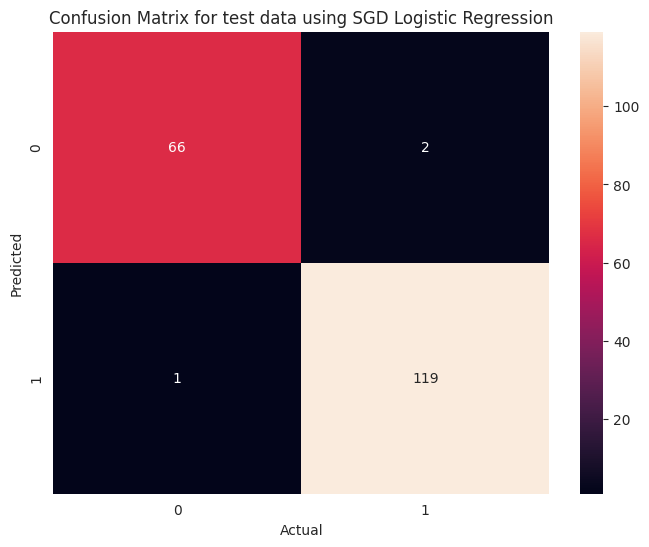

In [28]:
# Draw confusion matrix
mat_test = find_rates(confusion_matrix(y_test, y_pred_SGD))

fig = plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix for test data using SGD Logistic Regression')
sns.heatmap(mat_test, annot=True, fmt='g')

In [29]:
# Print a table to show every coefficient in vector w, and compute the absolute difference between coefficients of BGD and SGD with momentum methods.

from prettytable import PrettyTable

p = PrettyTable()
p.title = 'Weights from both models'
p.field_names = ['SKlearn', 'BGD', 'SGD', 'Difference']

# You can directly run the code below to output the table or rewrite it.
# Please remain five decimal places
for i in range(1, 31):
    p.add_row(['{:.5f}'.format(coef[i - 1]), '{:.5f}'.format(w_BGD[i]),
               '{:.5f}'.format(w_SGD[i]), '{:.5f}'.format(abs(w_BGD[i] - w_SGD[i]))])
print(p)
# LRclf.coef_[0, i]

+----------------------------------------------+
|           Weights from both models           |
+----------+-----------+----------+------------+
| SKlearn  |    BGD    |   SGD    | Difference |
+----------+-----------+----------+------------+
| -0.33269 |  -3.60382 | -0.36479 |  3.23902   |
| -0.35660 |  -5.84576 | -0.34029 |  5.50546   |
| -0.32618 |  -3.50836 | -0.36234 |  3.14603   |
| -0.33995 |  -4.43808 | -0.35129 |  4.08679   |
| -0.12556 |  -4.50551 | -0.17064 |  4.33486   |
| 0.03085  |  2.92869  | -0.11668 |  3.04537   |
| -0.37123 |  -6.00063 | -0.28407 |  5.71656   |
| -0.47501 |  -6.96736 | -0.40054 |  6.56681   |
| -0.04295 |  -0.36137 | -0.07933 |  0.28204   |
| 0.18929  |  2.51731  | 0.22256  |  2.29475   |
| -0.45881 | -10.07003 | -0.31717 |  9.75285   |
| 0.02783  |  1.93975  | 0.01297  |  1.92678   |
| -0.35493 |  -7.35442 | -0.27850 |  7.07591   |
| -0.35434 |  -8.03878 | -0.28779 |  7.75099   |
| -0.07387 |  -0.83634 | -0.03772 |  0.79862   |
| 0.19670  |  6.4990